In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("imdb_reviews.csv")

In [ ]:
df.head()

,id,text,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,neg
1,2,This is an example of why the majority of acti...,neg
2,3,"First of all I hate those moronic rappers, who...",neg
3,4,Not even the Beatles could write songs everyon...,neg
4,5,Brass pictures movies is not a fitting word fo...,neg


In [ ]:
df.shape

(49459, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

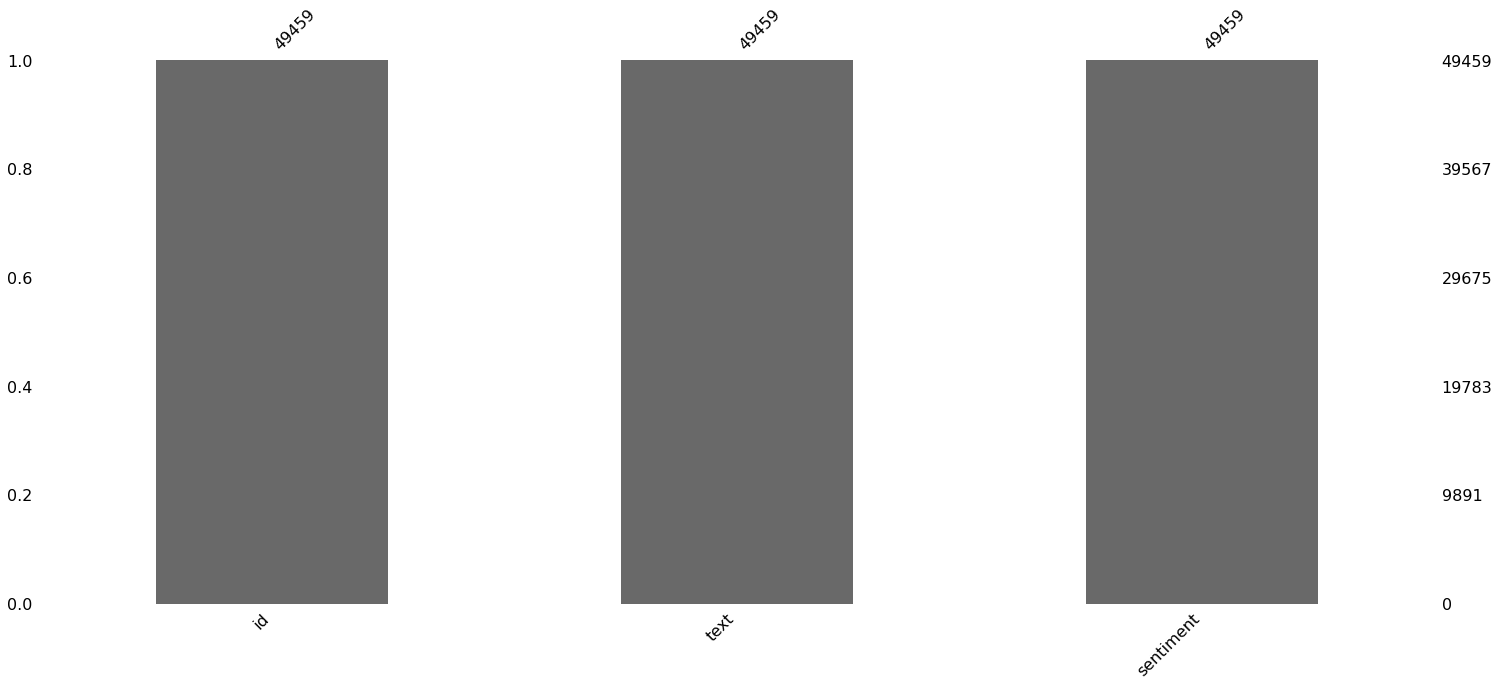

In [ ]:
import missingno as mn
mn.bar(df)
plt.show

In [ ]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id   text  sentiment
0      False  False      False
1      False  False      False
2      False  False      False
3      False  False      False
4      False  False      False
...      ...    ...        ...
49454  False  False      False
49455  False  False      False
49456  False  False      False
49457  False  False      False
49458  False  False      False

[49459 rows x 3 columns]>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df['lnum']=df.sentiment.map({'pos':1,'neg':0})
df

,id,text,sentiment,lnum
0,1,Once again Mr. Costner has dragged out a movie...,neg,0
1,2,This is an example of why the majority of acti...,neg,0
2,3,"First of all I hate those moronic rappers, who...",neg,0
3,4,Not even the Beatles could write songs everyon...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,neg,0
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",pos,1
49456,49458,I am amazed at how this movieand most others h...,pos,1
49457,49459,A Christmas Together actually came before my t...,pos,1


In [ ]:
X = df['text']
Y = df['lnum']

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size = 0.4, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X_train_dtm = cv.fit_transform(X_train)
X_test_dtm=cv.transform(X_test)
print(cv.get_feature_names_out())
df=pd.DataFrame(X_train_dtm.toarray(),columns=cv.get_feature_names_out())

['00' '000' '0000000000001' ... 'ã¼bermenschlich' 'ã½' 'ã½s']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_dtm,Y_train)
predicted = clf.predict(X_test_dtm)

In [ ]:
cm = confusion_matrix(Y_test,predicted)
cm

array([[8739, 1201],
       [1695, 8149]])

In [ ]:
b=accuracy_score(Y_test,predicted)
b

0.8536190861302062

In [ ]:
from sklearn import metrics

In [ ]:
print("Precision :",metrics.precision_score(Y_test, predicted,average='micro'))
print("Recall : ",metrics.recall_score(Y_test, predicted,average='micro'))

Precision : 0.8536190861302062
Recall :  0.8536190861302062
